# About Plotly

Plotly is a Data Viz library by the company Plotly based out of Canada with support in languages such as Python, Js, Julia etc.

Advantages

• Multi language support :  Works with Python, JS, Julia, etc.

• Lot's of graphs : Offers numerous chart types

• Interactive plots : Allows zooming, hovering, and filtering

• Beautiful plots :Creates aesthetically pleasing charts.

Does not work with live data streams. Dash can be explored for that.


# The Plotly Roadmap

• Plotly Go 

• Plotly Express

• Dash

Working with Plotly Go


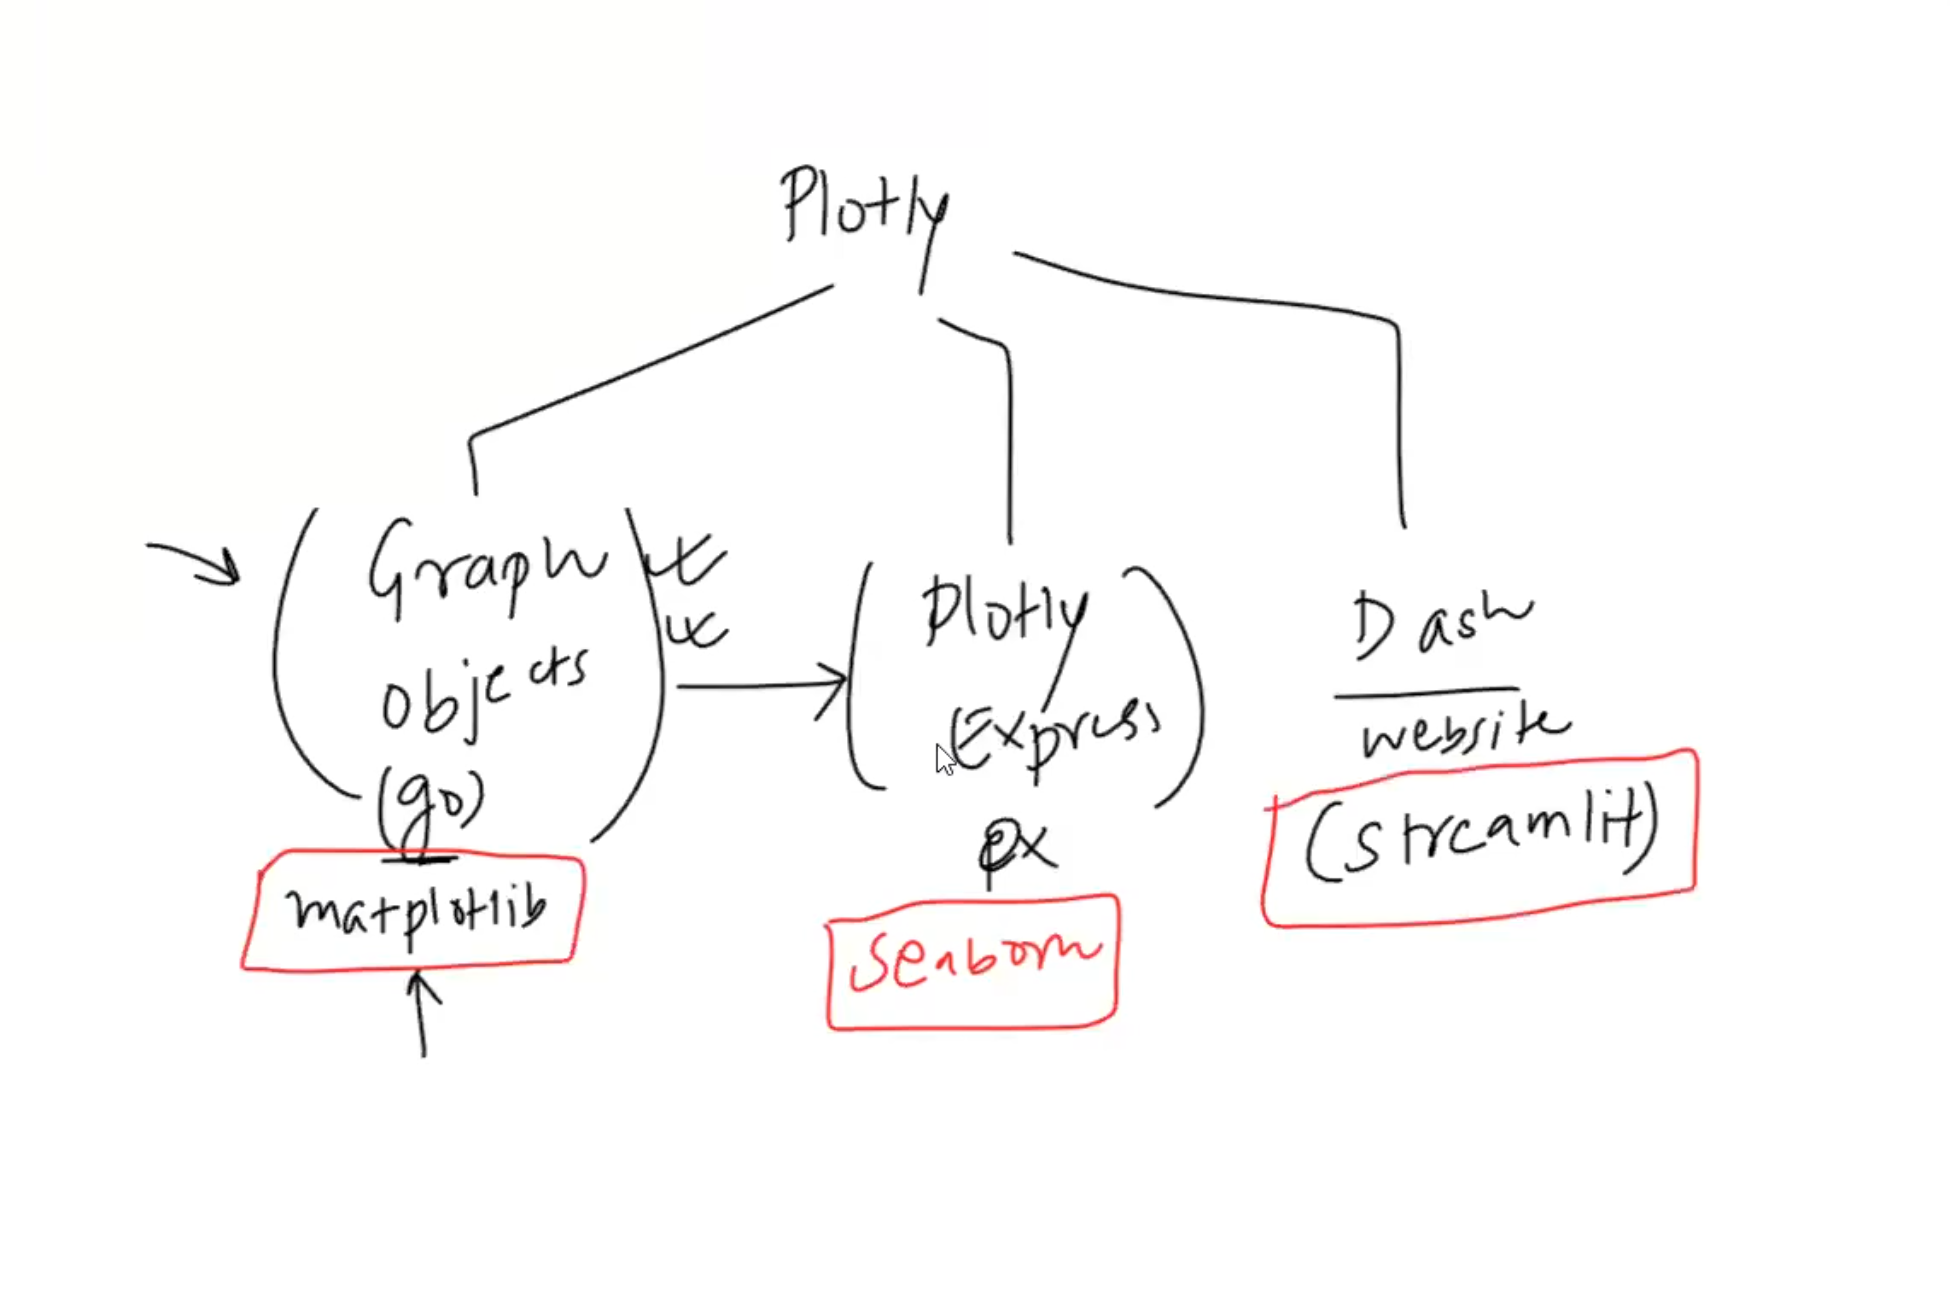

# working with plotly Go..



In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
# !pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
# load the datasets..
tips = px.data.tips()
iris = px.data.iris()
gap = px.data.gapminder()

In [5]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [87]:
# scatter plot using plotly go

temp_df = gap[gap['year']==2007]
temp_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [12]:
trace1 = go.Scatter(x=temp_df['lifeExp'], y=temp_df['gdpPercap'])

data = [trace1]
layout = go.Layout(title="Life Exp vs GDP per capita for 2007", xaxis={'title':'life Exp'}, yaxis={'title':'GDP'})
fig = go.Figure(data, layout)

fig.show()

In [14]:
trace1 = go.Scatter(x=temp_df['lifeExp'], y=temp_df['gdpPercap'], mode='markers')

data = [trace1]
layout = go.Layout(title="Life Exp vs GDP per capita for 2007", xaxis={'title':'life Exp'}, yaxis={'title':'GDP'})
fig = go.Figure(data, layout)

fig.show()

In [22]:
trace1 = go.Scatter(x=temp_df['lifeExp'], y=temp_df['gdpPercap'], mode='markers')
trace2 = go.Scatter(x=[0,1,2], y=[0,90, 30000], mode='lines')
data = [trace1, trace2]
layout = go.Layout(title="Life Exp vs GDP per capita for 2007", xaxis={'title':'life Exp'}, yaxis={'title':'GDP'})
fig = go.Figure(data, layout)

fig.show()

# plotly express

In [23]:
# plot the life ex and gdp scatter plot -> continent as color -> pop as size -> hover name -> range _x/range_y -> lox_x/loy_y

In [26]:
px.scatter(temp_df, x='lifeExp', y='gdpPercap', color='continent')

In [88]:
# color , size

px.scatter(temp_df, x='lifeExp', y='gdpPercap', color='continent', size='pop', size_max=100)

In [89]:
# max_size , hover_name

px.scatter(temp_df, x='lifeExp', y='gdpPercap', color='continent', size='pop', size_max=100, hover_name='country')

In [83]:
# plot animation of the above curve on the basic of year

# Create the animated scatter plot
fig = px.scatter(gap, x='lifeExp', y='gdpPercap',
                 color='continent', size='pop',
                 size_max=100, hover_name='country',
                 range_x=[30, 95],
                 animation_frame='year', animation_group='country'
                 ,height=500, width=600)
fig.show()

animation_frame, animation_group (use for a year and group)

In [44]:
fig = px.scatter(gap, x='lifeExp', y='gdpPercap',
                 color='continent', size='pop',
                 size_max=100, hover_name='country',
                 animation_frame='year', animation_group='country')
fig.update_layout(xaxis=dict(range=[30, 90]))
fig.show()

In [47]:
# line plot 
# plot india pop line plot
# india ka populations
temp_df = gap[gap['country']=='India']
px.line(temp_df, x= 'year', y='pop', title='India ka Population growth')

In [78]:
# plot india china pk china ka population ka line plot

temp_df = gap[gap['country'].isin(['India', 'China', 'Pakistan'])].pivot(index='year', columns='country', values='lifeExp')
temp_df

country,China,India,Pakistan
year,,,
1952,44.00000,37.373,43.436
1957,50.54896,40.249,45.557
1962,44.50136,43.605,47.670
1967,58.38112,47.193,49.800
1972,63.11888,50.651,51.929
1977,63.96736,54.208,54.043
1982,65.52500,56.596,56.158
1987,67.27400,58.553,58.245
1992,68.69000,60.223,60.838


In [79]:
px.line(temp_df, x=temp_df.index, y=temp_df.columns)

In [ ]:
# bar chart
# india's pop over the years

temp_df = gap[gap['country']=='India']
px.bar(temp_df, x='year',height=300, width=500, y='pop'
       )

In [58]:
# pop comp of 3 country
# group bar chart
temp_df = gap[gap['country'].isin(['India', 'China', 'Pakistan'])].pivot(index='year', columns='country', values='gdpPercap')
temp_df

country,China,India,Pakistan
year,,,
1952,400.448611,546.565749,684.597144
1957,575.987001,590.061996,747.083529
1962,487.674018,658.347151,803.342742
1967,612.705693,700.770611,942.408259
1972,676.900092,724.032527,1049.938981
1977,741.237470,813.337323,1175.921193
1982,962.421381,855.723538,1443.429832
1987,1378.904018,976.512676,1704.686583
1992,1655.784158,1164.406809,1971.829464


In [71]:
px.bar(temp_df, x =temp_df.index, y=temp_df.columns,height=300, width=500, barmode='group')

In [91]:
temp_df = gap[gap['country'].isin(['India', 'China', 'Pakistan'])].pivot(index='year', columns='country', values='pop')
temp_df

country,China,India,Pakistan
year,,,
1952,556263527,372000000,41346560
1957,637408000,409000000,46679944
1962,665770000,454000000,53100671
1967,754550000,506000000,60641899
1972,862030000,567000000,69325921
1977,943455000,634000000,78152686
1982,1000281000,708000000,91462088
1987,1084035000,788000000,105186881
1992,1164970000,872000000,120065004


In [93]:
px.bar(temp_df, x =temp_df.index,
       y=temp_df.columns, barmode='group',
       log_y=True, text_auto=True,
       height=300, width=500)

In [94]:
# stacked bar chart
# pop contrinution per country to a continents pop stacked for a particualr year(2007)

In [99]:
temp_df = gap[gap['year']==2007]
px.bar(temp_df, x='continent', y='pop', color='country', log_y=True,
       height=300, width=600)

In [108]:
fig = px.bar(
    gap, 
    x='continent', 
    y='pop', 
    color='continent', 
    animation_frame='year', 
    animation_group='country', 
    range_y=[0, 400_000_0000],  # Readability: use underscore for large numbers
    height=500,  # Adjusted for better aspect ratio
    width=700  # Wider for better visualization
)

fig.show()

In [112]:
# hsitogram
# plot histogram of life expt of all countries in 2007 -> nbins ->  text_auto

temp_df = gap[gap['year']==2007]

px.histogram(temp_df, x='lifeExp', nbins=20,text_auto=True)

In [113]:
# plot the histo. of sepal length of all iris species..

iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [116]:
px.histogram(iris, x='sepal_length', color='species', nbins=30, text_auto=True)

In [125]:
# pie chart -> values -> names
# find the pie chart of pop of european countries in 2007

temp_df=gap[(gap['year']==2007) & (gap['continent']=='Europe')]
px.pie(temp_df, values='pop', names='country' , width=600, height=400
       )

In [130]:
# plot the pie chart of world pop in 1952 continent wise -> explode(pull)

temp_df = gap[gap['year']==1952].groupby('continent')['pop'].sum().reset_index()
px.pie(temp_df, values='pop', names='continent')

In [138]:
gap

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [141]:
# sunbrust plot -> subbrust plots visulaize hierarchical data spanning outwards radially from root to leaves

# path -> [], values

temp_df=gap[gap['year']==2007]

px.sunburst(temp_df, path=['country', 'continent'], values='pop', color='lifeExp')

In [145]:
px.sunburst(tips, path=['sex',  'smoker','tip', 'day', 'time'], values='total_bill', color='size')

In [148]:
# treemap

temp_df=gap[gap['year']==2007]
px.treemap(temp_df, path=[px.Constant('world'), 'continent', 'country'], values='pop', color='lifeExp', width=800, height=400)

In [153]:
# heatmap -> find heatmap of all continents with year on avg life express

temp_df = tips.pivot_table(index='day', columns='sex', values='total_bill', aggfunc='sum')
px.imshow(temp_df)

In [155]:
temp_df = gap.pivot_table(index='year', columns='continent', values='lifeExp', aggfunc='mean')
px.imshow(temp_df)

In [161]:
# 3d scatter plot of all country data for 2007
temp_df = gap[gap['year']==2007]
px.scatter_3d(temp_df, x='lifeExp', y='pop', z= 'gdpPercap', log_y=True, color='continent', hover_name='country')

In [163]:
# iris

px.scatter_3d(iris, x = 'sepal_length', y = 'sepal_width', z = 'petal_length', color='species')

In [167]:
# scatter_matrix -> dimensions

px.scatter_matrix(iris, dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], color='species', width=800, height=400)